In [1]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import seaborn as sns
from scipy import stats
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
import os
from astropy.wcs import WCS
from astropy.stats import mad_std
from astropy.modeling.models import Rotation2D
from scipy.ndimage import rotate
%matplotlib inline
sns.set()

In [2]:
#the first 4 cells carry out the process of image reduction
M91_bias_files = os.listdir('C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/bias/')
x = len(M91_bias_files)

M91_bias_directories = []
for i in range(x):
    M91_bias_directories.append(f'C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/bias/{M91_bias_files[i]}')

bias_data = np.zeros(shape=(2048, 2098))
for file in M91_bias_directories:
    image = fits.open(file)
    bias_data += (image[0].data)

M91_master_bias = bias_data/len(M91_bias_directories)

In [3]:
M91_flat_files = os.listdir('C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/flats/B/')
x = len(M91_flat_files)

M91_flat_directories = []
for i in range(x):
    M91_flat_directories.append(f'C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/flats/B/{M91_flat_files[i]}')

flat_data = np.zeros(shape=(2048, 2098))
for file in M91_flat_directories:
    image = fits.open(file)
    flat_data += ((image[0].data) - M91_master_bias)

M91_master_flats_B = flat_data/len(M91_flat_directories)
M91_master_flats_B_normalised = M91_master_flats_B/np.mean(M91_master_flats_B)

In [4]:
M91_flat_files = os.listdir('C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/flats/Halpha_NII/')
x = len(M91_flat_files)

M91_flat_directories = []
for i in range(x):
    M91_flat_directories.append(f'C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/flats/Halpha_NII/{M91_flat_files[i]}')

flat_data = np.zeros(shape=(2048, 2098))
for file in M91_flat_directories:
    image = fits.open(file)
    flat_data += ((image[0].data) - M91_master_bias)

M91_master_flats_Halpha_NII = flat_data/len(M91_flat_directories)
M91_master_flats_Halpha_NII_normalised = M91_master_flats_Halpha_NII/np.mean(M91_master_flats_Halpha_NII)

In [5]:
M91_flat_files = os.listdir('C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/flats/V/')
x = len(M91_flat_files)

M91_flat_directories = []
for i in range(x):
    M91_flat_directories.append(f'C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/flats/V/{M91_flat_files[i]}')

flat_data = np.zeros(shape=(2048, 2098))
for file in M91_flat_directories:
    image = fits.open(file)
    flat_data += ((image[0].data) - M91_master_bias)

M91_master_flats_V = flat_data/len(M91_flat_directories)
M91_master_flats_V_normalised = M91_master_flats_V/np.mean(M91_master_flats_V)

C:\Users\seanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\seanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\seanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in add
  


570.0
997


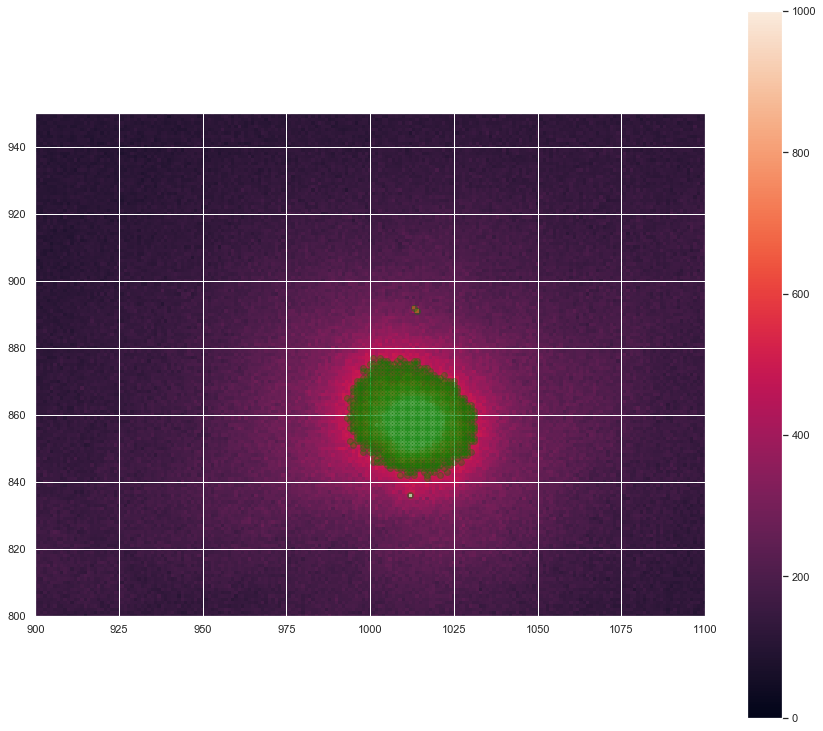

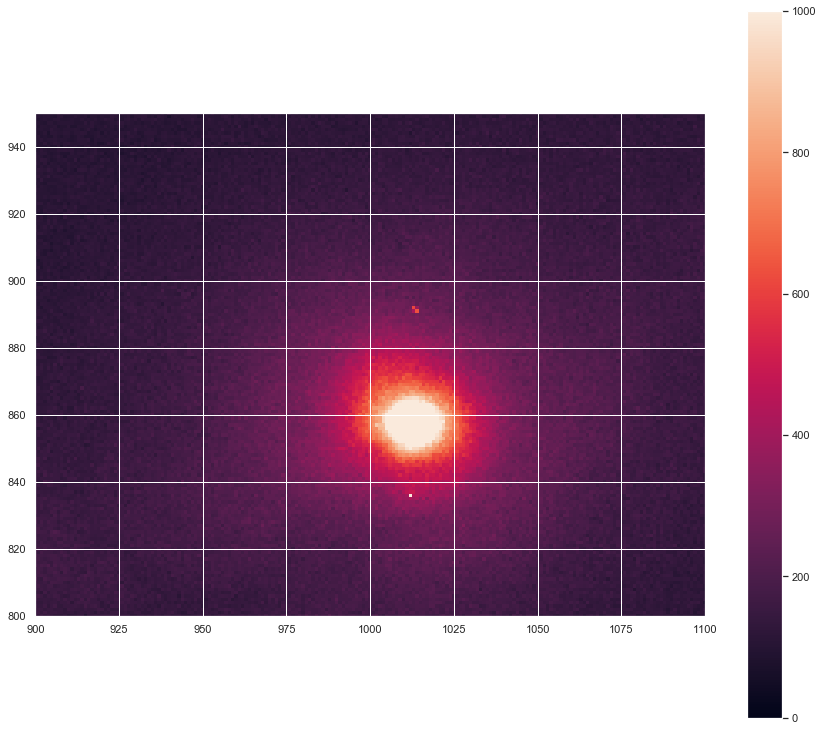

the major was found to be[41] pixels, the minor axis was found to be [34]


In [6]:
#determining the size of M91 in the combined B filter image
M91_object_B = os.listdir('C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/object/B/')
x = len(M91_object_B)

M91_object_B_directories = []
for i in range(x):
    M91_object_B_directories.append(f'C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/object/B/{M91_object_B[i]}')

exposure_time_B = 0    
B_filter_data = np.zeros(shape=(2048, 2098))
for file in M91_object_B_directories[1:]:
    image = fits.open(file)
    exposure_time_B += float(image[0].header['EXPTIME'])
    B_filter_data += ((image[0].data) - M91_master_bias)/M91_master_flats_B_normalised
 

print(exposure_time_B)

#the 50 left most columns are excluded from the image because they contain high pixels that arent caused by celestial objects
B_filter_data = B_filter_data[:,50:]  


background_mean = np.mean(B_filter_data[1000:1500,500:750])
sigmaB = mad_std(B_filter_data)

no_pixels = 0
x = []
y = []

for i in range(900,1100):  
    for j in range(750,950):
        if np.abs(B_filter_data[j][i]) >  background_mean + 40*sigmaB :
            x.append(i)
            y.append(j)
            no_pixels += 1
            
print(no_pixels)

fig= plt.figure(figsize=(15,13))
plt.scatter(x,y, alpha=0.3, color="green")
plt.imshow(B_filter_data,vmin=0, vmax=1000)
plt.xlim(900,1100)
plt.ylim(800,950)
plt.colorbar()
plt.show()

fig= plt.figure(figsize=(15,13))
plt.imshow(B_filter_data,vmin=0, vmax=1000)
plt.xlim(900,1100)
plt.ylim(800,950)
plt.colorbar()
plt.show()

x_max = []
y_max = []
angle = []

for k in range(1,37):
    B_filter_data_1 = rotate(B_filter_data, 5*k)
    x = []
    y = []
    for i in range(750,1500):
        for j in range(500,1650):
            if np.abs(B_filter_data_1[j][i]) >  background_mean + 40*sigmaB :
                x.append(i)
                y.append(j)
                no_pixels += 1

    x_mode = stats.mode(x)
    y_mode = stats.mode(y)
    x_max.append(x_mode[1])
    y_max.append(y_mode[1])
    angle.append(5*k)

    
major_axis = 0
minor_axis = 0
angle_ = 0
no = 0
for i in range(len(x_max)):
    if x_max[i] > major_axis:
        major_axis = x_max[i]
        minor_axis = y_max[i]
        angle_ = angle[i]


print(f'the major was found to be{major_axis} pixels, the minor axis was found to be {minor_axis}')


1200.0


C:\Users\seanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\seanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\seanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in add
  


960


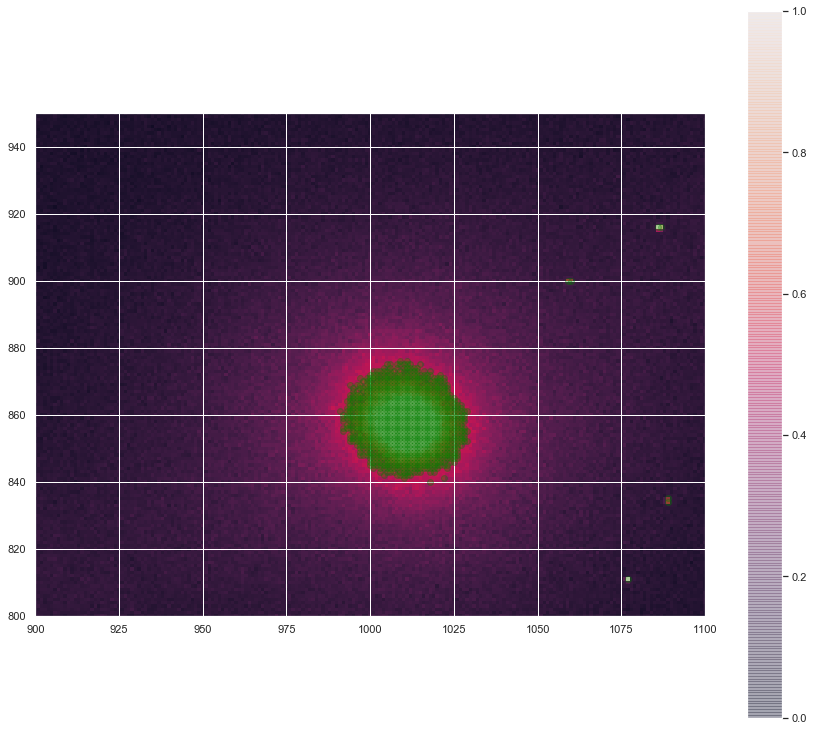

the major was found to be[41] pixels, the minor axis was found to be [35]


In [7]:
#determining the size of M91 in the combined Halpha_NII filter image
M91_object_Halpha_NII = os.listdir('C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/object/Halpha_NII/')
x = len(M91_object_Halpha_NII)

M91_object_Halpha_NII_directories = []
for i in range(x):
    M91_object_Halpha_NII_directories.append(f'C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/object/Halpha_NII/{M91_object_Halpha_NII[i]}')

exposure_time_H = 0
Halpha_NII_filter_data = np.zeros(shape=(2048, 2098))
for file in M91_object_Halpha_NII_directories:
    image = fits.open(file)
    exposure_time_H += float(image[0].header['EXPTIME'])
    Halpha_NII_filter_data += ((image[0].data) - M91_master_bias)/M91_master_flats_Halpha_NII_normalised

Halpha_NII_filter_data = Halpha_NII_filter_data[:,50:]
print(exposure_time_H)

background_mean = np.mean(Halpha_NII_filter_data[1000:1500,500:750])
sigma_Halpha_NII = mad_std(Halpha_NII_filter_data)

no_pixels = 0
x = []
y = []

for i in range(900,1100):  
    for j in range(750,950):
        if np.abs(Halpha_NII_filter_data[j][i]) >  background_mean + 40*sigma_Halpha_NII :
            x.append(i)
            y.append(j)
            no_pixels += 1
            
print(no_pixels)

fig= plt.figure(figsize=(15,13))
plt.imshow(Halpha_NII_filter_data,vmin=0, vmax=700)
plt.scatter(x,y, alpha=0.3, color="green")
plt.xlim(900,1100)
plt.ylim(800,950)
plt.colorbar()
plt.show()

x_max = []
y_max = []
angle = []

for k in range(1,37):
    Halpha_NII_filter_data_1 = rotate(Halpha_NII_filter_data, 5*k)
    x = []
    y = []
    for i in range(750,1500):
        for j in range(500,1650):
            if np.abs(Halpha_NII_filter_data_1[j][i]) >  background_mean + 40*sigma_Halpha_NII :
                x.append(i)
                y.append(j)
                no_pixels += 1

    x_mode = stats.mode(x)
    y_mode = stats.mode(y)
    x_max.append(x_mode[1])
    y_max.append(y_mode[1])
    angle.append(5*k)
    
    
major_axis = 0
minor_axis = 0
angle_ = 0
no = 0
for i in range(len(x_max)):
    if x_max[i] > major_axis:
        major_axis = x_max[i]
        minor_axis = y_max[i]
        angle_ = angle[i]

print(f'the major was found to be{major_axis} pixels, the minor axis was found to be {minor_axis}')

C:\Users\seanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\Users\seanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\seanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()


1080.0
2823


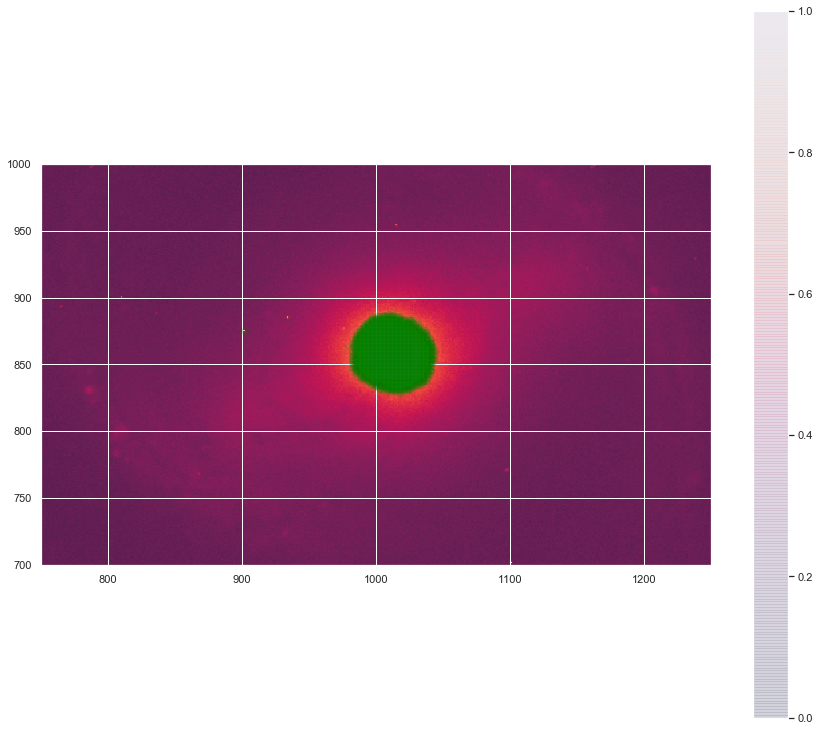

the major was found to be[65] pixels, the minor axis was found to be [59]


In [8]:
#determining the size of M91 in the combined V filter image

M91_object_V = os.listdir('C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/object/V/')
x = len(M91_object_V)

M91_object_V_directories = []
for i in range(x):
    M91_object_V_directories.append(f'C:/Users/seanj/3rd year labs/astro analysis/data_2019/M91/object/V/{M91_object_V[i]}')


exposure_time_V = 0
V_filter_data = np.zeros(shape=(2048, 2098))
for file in M91_object_V_directories:
    image = fits.open(file)
    exposure_time_V += float(image[0].header['EXPTIME'])
    V_filter_data += ((image[0].data) - M91_master_bias)/M91_master_flats_V_normalised 
    
V_filter_data = V_filter_data[:,50:]
print(exposure_time_V)

background_mean = np.mean(V_filter_data[1000:1500,500:750])
sigma_V = mad_std(V_filter_data)

no_pixels = 0
x = []
y = []

for i in range(900,1100):  
    for j in range(750,950):
        if np.abs(V_filter_data[j][i]) >  background_mean + 40*sigma_V :
            x.append(i)
            y.append(j)
            no_pixels += 1
            
print(no_pixels)

fig= plt.figure(figsize=(15,13))
plt.imshow(V_filter_data,vmin=0, vmax=2500)
plt.scatter(x,y, alpha=0.1, color="green")
plt.xlim(750,1250)
plt.ylim(700,1000)
plt.colorbar()
plt.show()


x_max = []
y_max = []
angle = []
     
for k in range(1,37):
    V_filter_data1 = rotate(V_filter_data, 5*k)
    x = []
    y = []
    for i in range(750,1500):
        for j in range(500,1650):
            if np.abs(V_filter_data1[j][i]) >  background_mean + 40*sigma_V :
                x.append(i)
                y.append(j)
                no_pixels += 1

    x_mode = stats.mode(x)
    y_mode = stats.mode(y)
    x_max.append(x_mode[1])
    y_max.append(y_mode[1])
    angle.append(5*k)
    

major_axis = 0
minor_axis = 0
angle_ = 0
no = 0
for i in range(len(x_max)):
    if x_max[i] > major_axis:
        major_axis = x_max[i]
        minor_axis = y_max[i]
        angle_ = angle[i]

print(f'the major was found to be{major_axis} pixels, the minor axis was found to be {minor_axis}')